# First look at logged data and 'R'

In [1]:
## Make copy of original databse for analysis

file.copy('../dataclean/database/ssen_merged.csv','./data/ssen_merged.csv')

[1] FALSE

In [2]:
data <- read.csv("./data/ssen_merged.csv", header=TRUE, sep=",", dec=".")

In [3]:
head(data)

elec_timestamp,demand,demand_max,anm_generated,non_anm_generated,total_generation_capacity,ANM_timestamp,operation_core,eqpt_core,site_core,...,site_2B,operation_3,eqpt_3,site_3,operation_4,eqpt_4,site_4,operation_4A,eqpt_4A,site_4A
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2019-01-16 22:42:03,19.66,35.7,17.145,17.075,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:43:03,19.02,35.7,16.829,17.520,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:44:03,18.40,35.7,14.394,17.245,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:45:03,18.25,35.7,13.674,17.446,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:46:03,18.70,35.7,14.572,16.457,57.1,2019-01-16 22:46:25,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:47:03,18.57,35.7,14.000,16.448,57.1,2019-01-16 22:46:25,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [4]:
summary(data)

             elec_timestamp       demand        demand_max    anm_generated   
 2019-01-16 22:42:03:     1   Min.   : 0.71   Min.   :35.70   Min.   : 0.000  
 2019-01-16 22:43:03:     1   1st Qu.:12.46   1st Qu.:35.70   1st Qu.: 1.629  
 2019-01-16 22:44:03:     1   Median :14.85   Median :35.70   Median : 5.089  
 2019-01-16 22:45:03:     1   Mean   :15.23   Mean   :35.70   Mean   : 6.638  
 2019-01-16 22:46:03:     1   3rd Qu.:17.80   3rd Qu.:35.70   3rd Qu.:10.965  
 2019-01-16 22:47:03:     1   Max.   :39.69   Max.   :39.69   Max.   :21.078  
 (Other)            :395049                                                   
 non_anm_generated total_generation_capacity             ANM_timestamp   
 Min.   : 0.000    Min.   :57.10             2019-05-06 07:33:10: 11909  
 1st Qu.: 3.445    1st Qu.:57.10             2019-05-17 10:52:10:  7507  
 Median : 9.002    Median :57.10             2019-10-10 12:46:10:  6700  
 Mean   : 9.841    Mean   :57.11             2019-08-24 10:39:12:  5560 

In [5]:
## convert timestamp strings to datetime data types
data$dt <- as.POSIXct(data$elec_timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT") ## all dates stored as GMT

In [18]:
options(repr.plot.width=8, repr.plot.height=4)

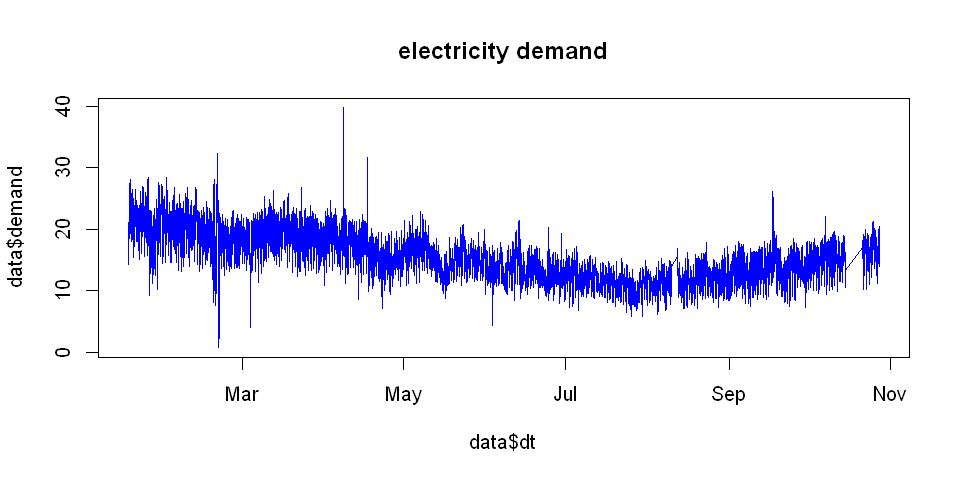

In [19]:
plot(data$dt, data$demand, main= "electricity demand", type= "l", col = "blue", pch=46)

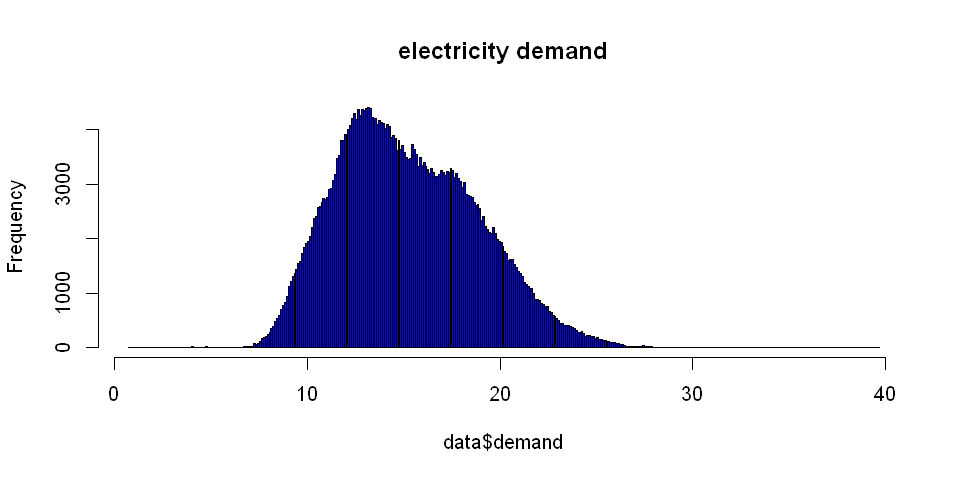

In [20]:
hist(data$demand, 500,main= "electricity demand", col = "blue")

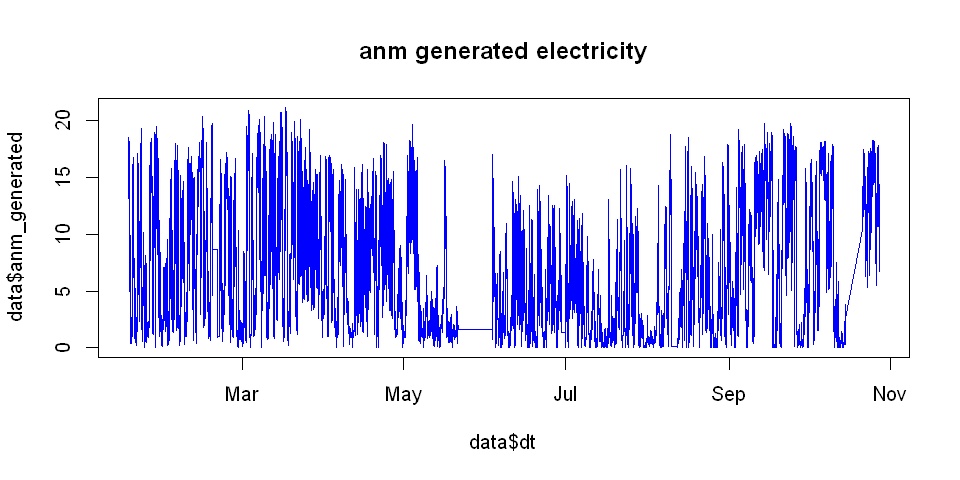

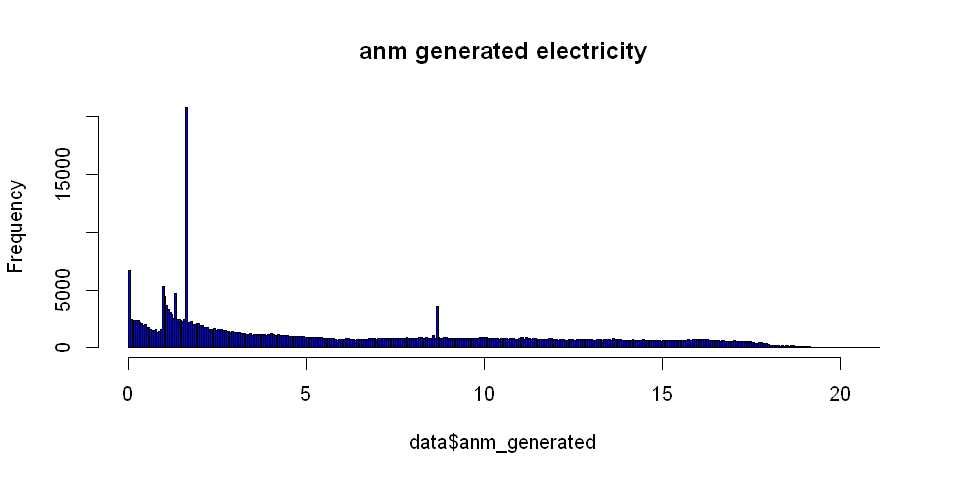

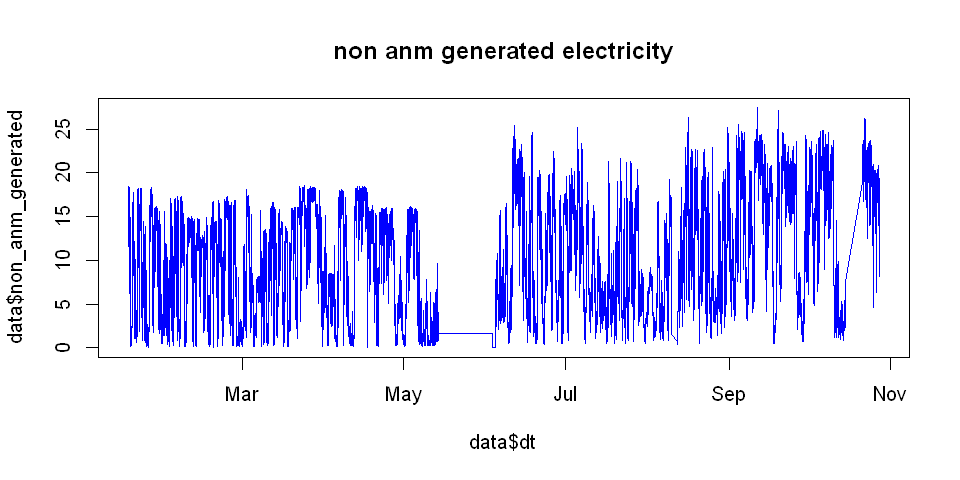

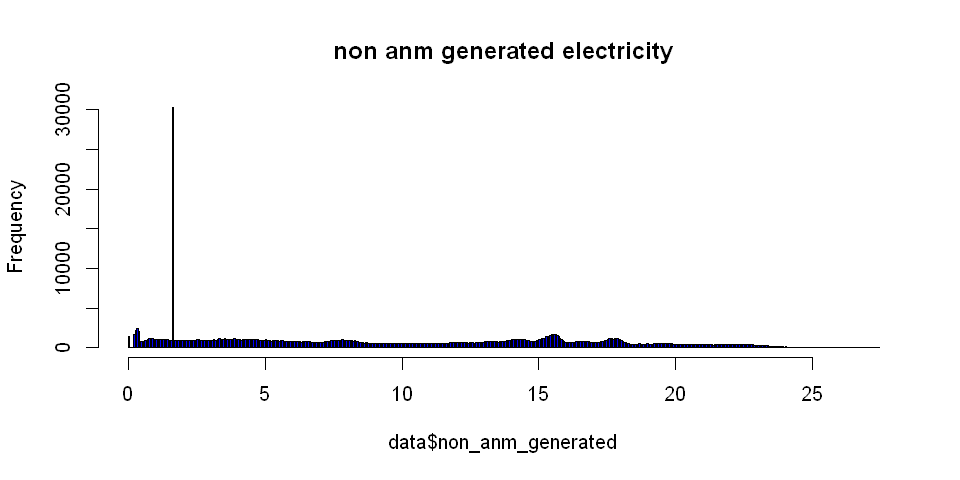

In [21]:
plot(data$dt, data$anm_generated, main= "anm generated electricity", type= "l", col = "blue", pch=46)
hist(data$anm_generated, 500,main= "anm generated electricity", col = "blue")
plot(data$dt, data$non_anm_generated, main= "non anm generated electricity", type= "l", col = "blue", pch=46)
hist(data$non_anm_generated, 500,main= "non anm generated electricity", col = "blue")

In [9]:
##  calculate total generated electricity
data$total_generated <- data$anm_generated+data$non_anm_generated

In [10]:
library(scales)

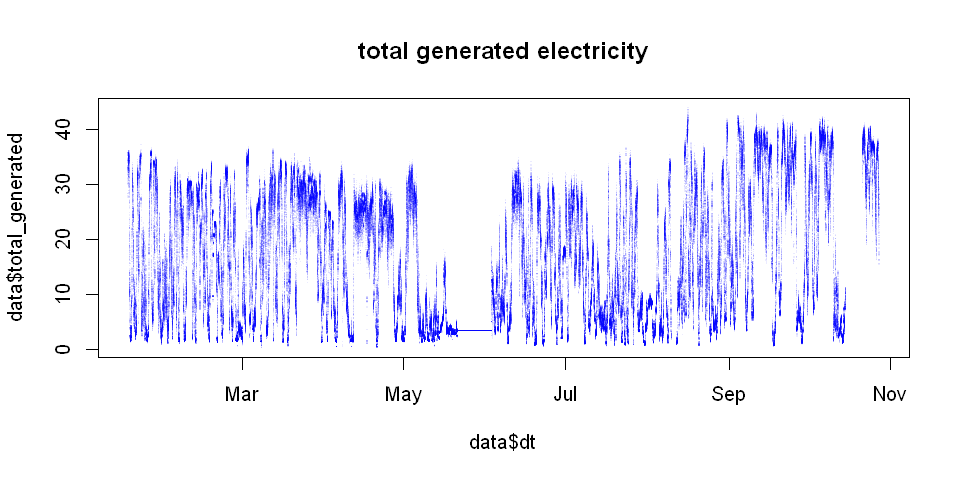

In [22]:
plot(data$dt, data$total_generated, main= "total generated electricity", col=alpha(c("blue"), 0.08), pch=46)